In [76]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd

In [74]:
#Import matplotlib and seaborn for visualizations 

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('C:/Users/sowmya.krishnan/Desktop/HTRU_2')

In [9]:
data.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
feature_names = data.columns.values[0:-1]
print(feature_names)

['mean_int_pf' 'std_pf' 'ex_kurt_pf' 'skew_pf' 'mean_dm' 'std_dm'
 'kurt_dm' 'skew_dm']


In [12]:
data.columns

Index(['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm',
       'kurt_dm', 'skew_dm', 'class'],
      dtype='object')

In [13]:
data.shape

(17898, 9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_int_pf    17898 non-null float64
std_pf         17898 non-null float64
ex_kurt_pf     17898 non-null float64
skew_pf        17898 non-null float64
mean_dm        17898 non-null float64
std_dm         17898 non-null float64
kurt_dm        17898 non-null float64
skew_dm        17898 non-null float64
class          17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


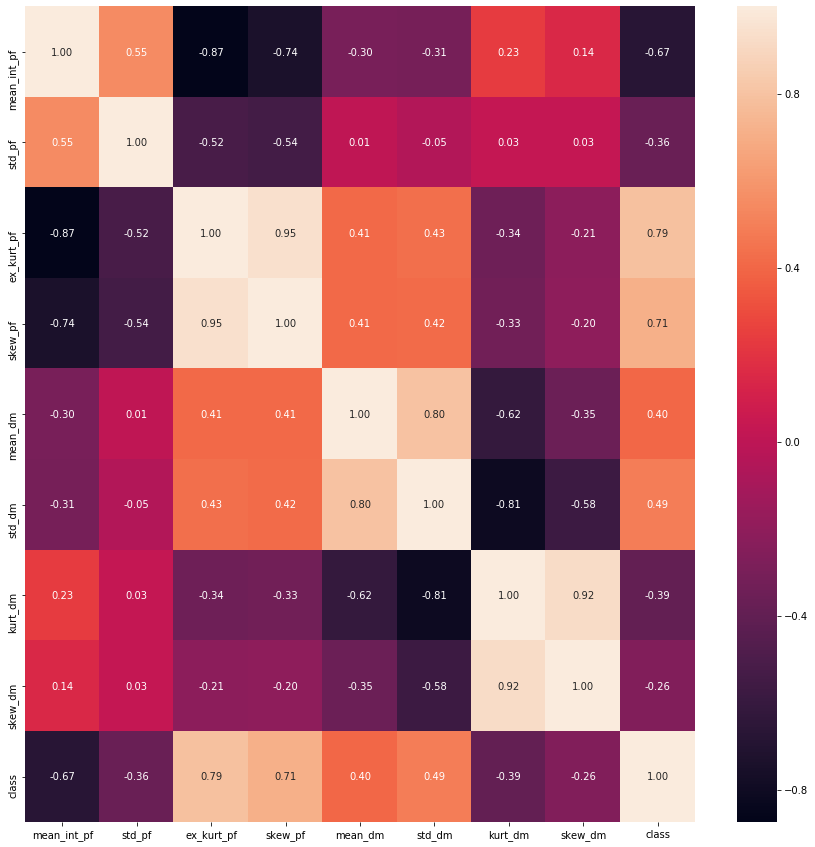

In [22]:
# Construct a heatmap to show co-relation between features 
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor="blue",fmt=".2f",ax=ax)
plt.show()

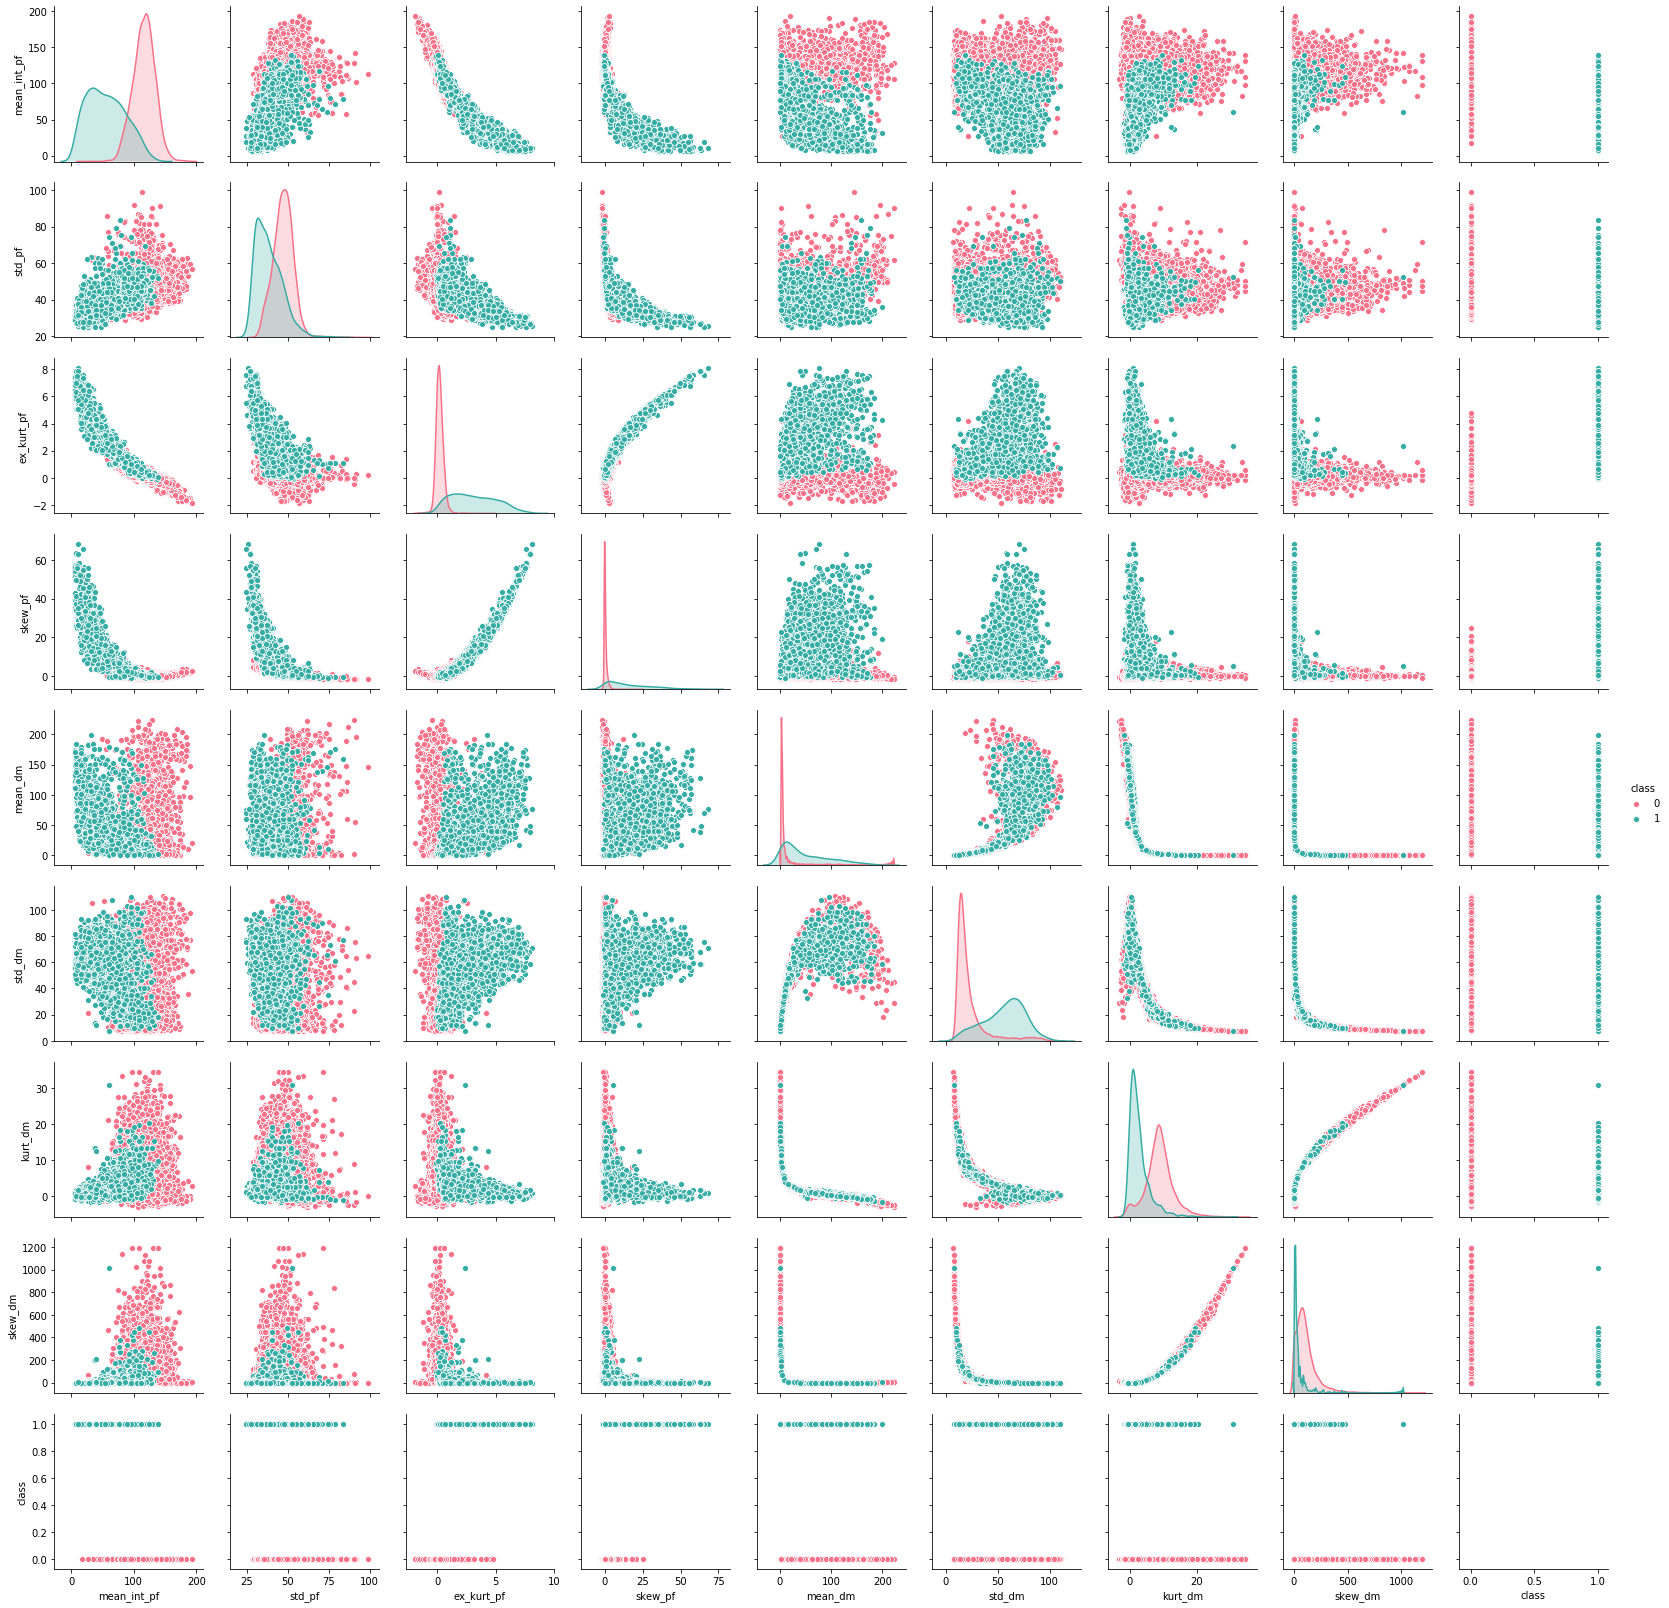

In [23]:
#Construct pairplots to show co-relations between features with classes 
g = sns.pairplot(data, hue="class",palette="husl",diag_kind = "kde",kind = "scatter")

In [25]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

#### LOGISTIC REGRESSION 

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction = lr.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_test,lr_prediction)

from sklearn.metrics import confusion_matrix,classification_report
cm_lr=confusion_matrix(y_test,lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cm_lr["total"]=cm_lr[0]+cm_lr[1]
cr_lr=classification_report(y_test,lr_prediction)

In [35]:
from sklearn.metrics import cohen_kappa_score
cks_lr= cohen_kappa_score(y_test, lr_prediction)

In [36]:
score_and_mse={"model":["logistic regression"],"Score":[lr.score(x_test,y_test)],"Cohen Kappa Score":[cks_lr],"MSE":[mse_lr]}
score_and_mse=pd.DataFrame(score_and_mse)

#### KNN Classification 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =13) # n_neighbors = k
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

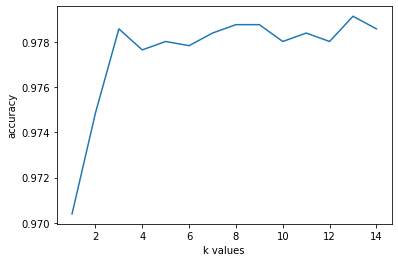

In [38]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [39]:
mse_knn=mean_squared_error(y_test,knn_prediction)
cm_knn=confusion_matrix(y_test,knn_prediction)
cm_knn=pd.DataFrame(cm_knn)
cr_knn=classification_report(y_test,knn_prediction)
cm_knn["total"]=cm_knn[0]+cm_knn[1]

In [57]:
from sklearn.metrics import cohen_kappa_score
cks_knn= cohen_kappa_score(y_test, knn_prediction)
score_and_mse = score_and_mse.append({'model': "knn classification","Score":knn.score(x_test,y_test),"Cohen Kappa Score":cks_knn,"MSE":mse_knn}, ignore_index=True)

#### DECISION TREE CLASSIFICATION 

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
prediction_dt=dt.predict(x_test)

In [59]:
dt_mse=mean_squared_error(y_test,prediction_dt)
dt_cm=confusion_matrix(y_test,prediction_dt)
dt_cm=pd.DataFrame(dt_cm)
dt_cm["total"]=dt_cm[0]+dt_cm[1]

cr_dt=classification_report(y_test,prediction_dt)
cks_dt= cohen_kappa_score(y_test, prediction_dt)

In [60]:
score_and_mse = score_and_mse.append({'model': "decision tree classification","Score":dt.score(x_test,y_test),"Cohen Kappa Score":cks_dt, "MSE":dt_mse}, ignore_index=True)

#### RANDOM FOREST CLASSIFICATION

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

prediction_rf=rf.predict(x_test)
rf_mse=mean_squared_error(y_test,prediction_rf)
rf_cm=confusion_matrix(y_test,prediction_rf)
rf_cm=pd.DataFrame(rf_cm)
rf_cm["total"]=rf_cm[0]+rf_cm[1]

cr_rf=classification_report(y_test,prediction_rf)
cks_rf= cohen_kappa_score(y_test, prediction_rf)

In [62]:
score_and_mse = score_and_mse.append({'model': "random forest classification","Score":rf.score(x_test,y_test),"Cohen Kappa Score":cks_rf,"MSE":rf_mse}, ignore_index=True)

#### Evaluating the performance of our classifier

In [50]:
print('Classification report for Logistic Regression: \n',cr_lr)
print('Classification report for KNN Classification: \n',cr_knn)
print('Classification report for Decision Tree Classification: \n',cr_dt)
print('Classification report for Random Forest Classification: \n',cr_rf)

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4880
           1       0.94      0.77      0.84       490

    accuracy                           0.97      5370
   macro avg       0.96      0.88      0.92      5370
weighted avg       0.97      0.97      0.97      5370

Classification report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.93      0.83      0.88       490

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

Classification report for Decision Tree Classification: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4880
           1       0.83      0.83      0.83       490

    accuracy               

#### CONFUSION MATRIX 

Text(0.5, 1, 'Random Forest Classification')

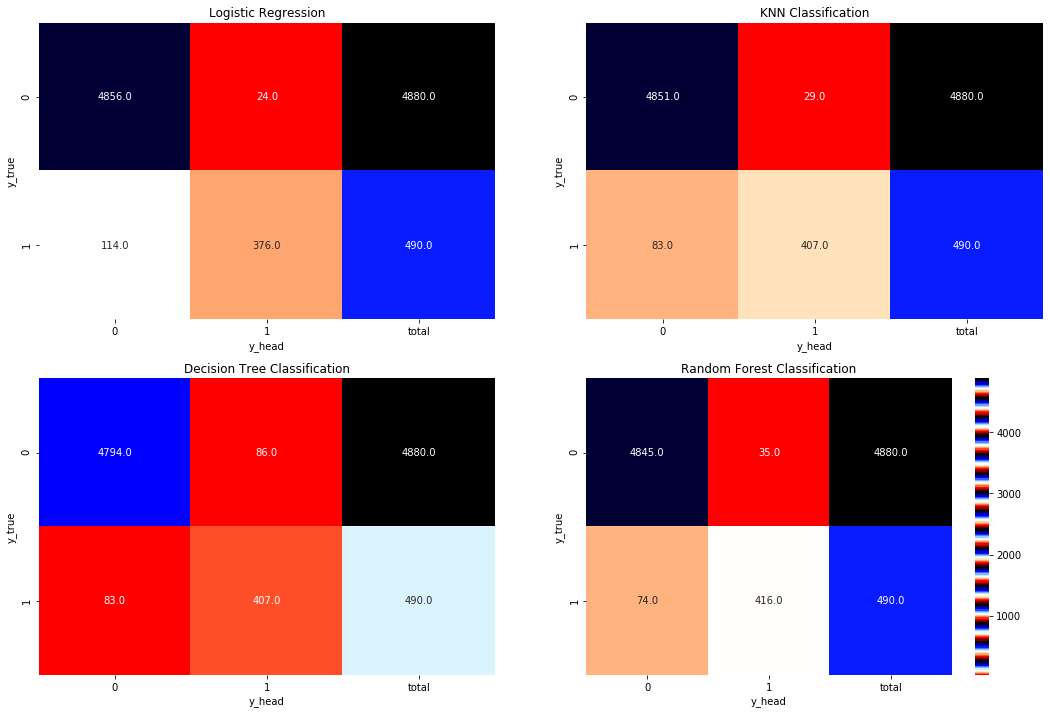

In [54]:
f, axes = plt.subplots(2, 2,figsize=(18,12))
g1 = sns.heatmap(cm_lr,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,0])
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')
g1.set_title("Logistic Regression")
g2 = sns.heatmap(cm_knn,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[0,1])
g2.set_ylabel('y_true')
g2.set_xlabel('y_head')
g2.set_title("KNN Classification")
g3 = sns.heatmap(dt_cm,annot=True,fmt=".1f",cmap="flag",cbar=False,ax=axes[1,0])
g3.set_ylabel('y_true')
g3.set_xlabel('y_head')
g3.set_title("Decision Tree Classification")
g4 = sns.heatmap(rf_cm,annot=True,fmt=".1f",cmap="flag",ax=axes[1,1])
g4.set_ylabel('y_true')
g4.set_xlabel('y_head')
g4.set_title("Random Forest Classification")

#### Receiver Operating Characteristic(ROC) Curve

Text(0, 0.5, 'True Positive Rate')

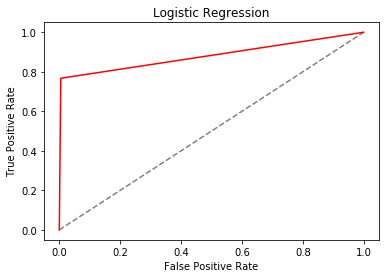

In [55]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, lr_prediction)
plt.plot([0, 1], [0, 1], 'k--',color="grey")
plt.plot(fpr_lr, tpr_lr,color="red")
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [65]:
importances = rf.feature_importances_
indices = np.argsort(importances)

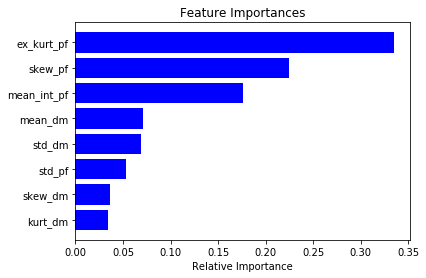

In [67]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')

plt.show()